In [ ]:
# Convolutional Neural Network - it Extract the feature of image and convert it into lower dimension without loosing its characteristics.

In [1]:
import tensorflow as tf

In [2]:
device_name= tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError("GPU Device not Founded")
print('Found GPU At: {}',format(device_name))

Found GPU At: {} /device:GPU:0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [4]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels)= cifar10.load_data()
#e will use CIFAR-10 dataset to build a CNN image classifier. CIFAR-10 dataset has 10 different labels
# Airplane, Automobile, Bird, Cat, Deer, Dog,Frog,Horse,Ship, Truck
# It has 50,000 training data and 10,000 testing image data. Image size in CIFAR-10 is 32 x 32 x 3.

170498071/170498071 [==============================] - 44s 0us/step


Training Data shape : (50000, 32, 32, 3) (50000, 1)
Test data shape : (10000, 32, 32, 3) (10000, 1)
Total number of Outputs:  10
Output classes : [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

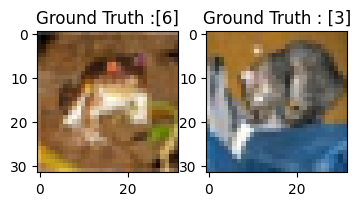

In [5]:
print("Training Data shape :", train_images.shape, train_labels.shape)
print("Test data shape :", test_images.shape, test_labels.shape)

# for now We will print two example image from dataset (Cifar10). 

#find the unique number from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of Outputs: ',nClasses)
print('Output classes :', classes)

plt.figure(figsize=[4,2])

# Display the first image in training Data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth :{}".format(train_labels[0]))

# Display the first image of test data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [6]:
# find the shape of input image then reset it into input format for training and testing sets. 
# After that change all datatypes into float.
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [7]:
# Normalize the Data between 0-1 by dividing train data and test data with 255 then convert all
# labels into one-hot vector with to_categorical() function.

train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [8]:
# Display the change for category label using one-hot encoding.
print('Original label 0 :', train_labels[0])
print('After conversion to categorical (one-hot) :', train_labels_one_hot[0])

Original label 0 : [6]
After conversion to categorical (one-hot) : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
# Now Create our model
# add up Convo layer followed by pooling layers.
# then connect Dense(FC) layer to predict the classes.
# *input data fed to first convo layer,
# output of that convo layer act as input for next convo layer and so on.
# finally data is fed to FC layer which try to predict the correct labels.

def createModel():
  model = Sequential()

  # The first two layers with 32 filters of window size 3*3.
  model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu', input_shape= input_shape))
  model.add(Conv2D(32,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))

  return model

In [10]:
# initialise all parameter and compile our model with rmsprops optimiser. There are many 
# optimizers for example adam, SGD, GradientDescent, Adagrad, Adadelta, and Adamax.
# Here batch is 256 with 50 epochs.

model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer = 'rmsprop', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [12]:
# train our model then evaluate it.
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                     validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data,test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 18s 29ms/step - loss: 2.1075 - accuracy: 0.2201 - val_loss: 1.7897 - val_accuracy: 0.3409
Epoch 2/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7662 - accuracy: 0.3592 - val_loss: 1.5679 - val_accuracy: 0.4354
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5861 - accuracy: 0.4253 - val_loss: 1.4428 - val_accuracy: 0.4605
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 1.4553 - accuracy: 0.4752 - val_loss: 1.2925 - val_accuracy: 0.5288
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.3340 - accuracy: 0.5205 - val_loss: 1.2989 - val_accuracy: 0.5334
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 1.2454 - accuracy: 0.5564 - val_loss: 1.2404 - val_accuracy: 0.5434
Epoch 7/50
196/196 [==============================] - 4s 23ms/step - loss: 1.1693 - accuracy: 0.5849 - val_loss: 1.0619 - val_accuracy: 0.626

[0.7056961059570312, 0.7889999747276306]